In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pickle
sns.set()
#Importing all the required libraries for the smooth working of the model

In [2]:
df = pd.read_csv('file_name ABB.csv')
#Reading the file having data associated with pre term birth

In [3]:
df=df.replace('[^\d.]', '', regex=True).astype('float')
df.replace({-np.inf: -1_000_000, np.inf: 1_000_000}, inplace=True)
df
#Removing Nan. null and infinite values

,Time,GA,E,A,BMI,GD,O,thiazolidine,Arg-His,CA,...,GlcCer,kuroshine C,Lanopepden,lucentamycin E,NDBGHS,NCND,N-decanoyl histidine,Neomaclafungin D,nyalolide,quinocinnolinomycin C
0,1.0,12.4,1.0,26.0,35.0,37.0,0.0,74349.966770,17022.465880,39994.012960,...,2192.198045,12993.746500,20084.049860,12433.951000,571.313089,951.857339,94393.240110,4901.874907,0.672526,8432.834565
1,2.0,17.7,2.0,36.0,23.0,36.0,1.0,2384.547062,948.825980,4236.118786,...,387.994409,2289.479330,2151.196024,1628.106871,118.351466,4988.837687,3038.499021,3824.006793,123.165666,442.714643
2,1.0,14.7,2.0,33.0,20.0,38.4,0.0,2613.550769,3141.856230,46588.199010,...,349.633554,10616.887360,4516.178685,3331.434339,1123.453613,2253.374030,7362.476602,1563.565425,438.818003,643.609167
3,2.0,17.6,2.0,32.0,23.0,41.0,0.0,2194.996071,808.199852,16524.741580,...,757.057198,4686.375620,3394.217727,2647.634207,677.132935,883.680696,5155.878718,2193.345788,52.477928,954.548560
4,3.0,21.0,2.0,38.0,21.0,39.0,0.0,1817.522766,2837.689949,34506.018920,...,933.358147,4699.896917,4428.050557,3503.095363,754.789983,2918.285303,6385.127344,1788.994492,412.452337,1608.372980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1.0,15.3,2.0,33.0,19.0,40.0,0.0,23426.499590,13531.325210,84975.769820,...,2080.193411,3335.389548,6865.737478,4154.395614,1662.867325,1892.458139,25053.392460,2732.381588,720.156960,3285.309051
393,2.0,16.1,2.0,28.0,21.0,38.0,0.0,37716.651020,9228.939361,64394.341360,...,1949.699196,6034.331561,5306.821322,3122.755280,1905.363815,3360.467851,20716.203920,5983.629976,347.427580,2863.623797
394,3.0,22.1,2.0,19.0,24.0,40.0,0.0,24550.012590,11648.842740,22976.083000,...,1110.000031,2345.464339,4324.226032,2569.655510,1227.693101,2079.183162,12935.343220,9513.132512,375.154564,2150.209913
395,5.0,31.7,2.0,35.0,22.0,39.0,0.0,76881.717210,16147.996050,22422.169300,...,717.181328,566.444750,3354.496164,2121.639062,1299.216227,1688.374798,12594.155520,4334.789357,233.398239,2006.989886


In [4]:
df.columns
#Displaying columns to identify or segregate X and Y plane.

Index(['Time', 'GA', 'E', 'A', 'BMI', 'GD', 'O', 'thiazolidine', 'Arg-His',
       'CA', 'DH', 'EP', 'LPE', 'NME', 'OA', 'PRISTIMEROL', 'SA', 'TA', 'EDGP',
       'DTSGP', 'nonadecanediol', 'EDGP.1', 'HMHSGP', 'ABMADEA', 'Amikacin',
       'Cristaldehyde B', 'Ganodermalactone T', 'GlcCer', 'kuroshine C',
       'Lanopepden', 'lucentamycin E', 'NDBGHS', 'NCND',
       'N-decanoyl histidine', 'Neomaclafungin D', 'nyalolide',
       'quinocinnolinomycin C'],
      dtype='object')

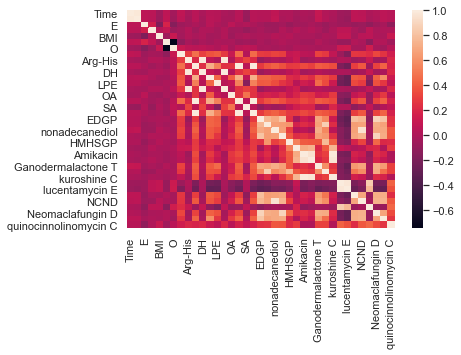

In [6]:
p = sns.heatmap(df.corr())
#plotting a correlation heatmap

In [12]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(['Time', 'GA', 'E', 'A', 'BMI', 'GD', 'O'],axis = 1),), columns=[ 'thiazolidine', 'Arg-His',
       'CA', 'DH', 'EP', 'LPE', 'NME', 'OA', 'PRISTIMEROL', 'SA', 'TA', 'EDGP',
       'DTSGP', 'nonadecanediol', 'EDGP.1', 'HMHSGP', 'ABMADEA', 'Amikacin',
       'Cristaldehyde B', 'Ganodermalactone T', 'GlcCer', 'kuroshine C',
       'Lanopepden', 'lucentamycin E', 'NDBGHS', 'NCND',
       'N-decanoyl histidine', 'Neomaclafungin D', 'nyalolide',
       'quinocinnolinomycin C'])
X
#Assigning all the columns other than outcome column do the X variable using standard scaler and then displaying X

,thiazolidine,Arg-His,CA,DH,EP,LPE,NME,OA,PRISTIMEROL,SA,...,GlcCer,kuroshine C,Lanopepden,lucentamycin E,NDBGHS,NCND,N-decanoyl histidine,Neomaclafungin D,nyalolide,quinocinnolinomycin C
0,1.854938,0.489968,-0.560345,0.498981,-0.845728,-0.741326,0.427087,-0.249144,-0.546029,2.887653,...,0.032768,2.000064,2.724326,2.604142,-0.689832,-0.673232,4.256559,-0.327571,-0.866326,1.476418
1,-0.957778,-0.866335,-1.102193,-0.854563,-0.976619,-0.706519,-0.836544,-0.338528,-1.096532,-0.164601,...,-0.859606,-0.550747,-1.247268,-1.169903,-0.842344,-0.224009,-1.198816,-0.478554,-0.732533,-1.308693
2,-0.948828,-0.681286,-0.460421,-0.664242,-0.452131,-0.823195,-0.663389,-0.481017,-0.445050,0.387729,...,-0.878580,1.433662,-0.723495,-0.574999,-0.503927,-0.528403,-0.940603,-0.795188,-0.387764,-1.238667
3,-0.965186,-0.878201,-0.915980,-0.856883,-1.041764,-0.017356,-0.824527,-0.536398,-0.918460,-0.778861,...,-0.677064,0.020430,-0.971976,-0.813823,-0.654203,-0.680819,-1.072373,-0.706971,-0.809742,-1.130283
4,-0.979940,-0.706952,-0.643506,-0.691925,-0.905577,-0.642093,-0.675358,-0.452595,-0.604977,0.944340,...,-0.589864,0.023652,-0.743012,-0.515045,-0.628056,-0.454414,-0.998967,-0.763611,-0.416562,-0.902380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,-0.135368,0.195383,0.121275,0.251788,-0.432232,-0.480745,0.223792,-0.258014,0.139224,0.451178,...,-0.022630,-0.301508,-0.203137,-0.287572,-0.322307,-0.568565,0.115834,-0.631465,-0.080473,-0.317851
393,0.423152,-0.167654,-0.190600,-0.133349,-0.497712,-0.165981,-0.147527,-0.455735,-0.165128,-0.126701,...,-0.087174,0.341646,-0.548391,-0.647882,-0.240659,-0.405209,-0.143167,-0.176043,-0.487585,-0.464838
394,-0.091457,0.036538,-0.818222,-0.000019,-0.449479,-0.740343,0.009726,-0.381233,-0.787302,0.006636,...,-0.502496,-0.537406,-0.766006,-0.841058,-0.468830,-0.547787,-0.607812,0.318355,-0.457300,-0.713512
395,1.953890,0.416180,-0.826615,0.429332,-0.539350,-0.592611,0.307632,-0.228367,-0.793110,1.121625,...,-0.696787,-0.961344,-0.980773,-0.997532,-0.444748,-0.591275,-0.628186,-0.407006,-0.612132,-0.763434


In [14]:
y = df.O

#Assigning the column(Outcome)to the y variable and then displaying Y


In [6]:
X = df.drop('O', axis=1)
y = df['O']
#Alternative to above step

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=7)
#we will split the data into training and testing data using the train_test_split function



In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
#Importing sklearn.ensemble and building the model using RandomForest



RandomForestClassifier(n_estimators=200)

In [17]:
rfc_train = rfc.predict(X_train)
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))
#Checking the accuracy score(trainingdata) after making the model

Accuracy_Score = 1.0


In [18]:

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))
#Now obtain the accuracy score for Random Forest

Accuracy_Score = 0.8106060606060606


In [19]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
#confusion matrix and Classification report for random forest based model

[[107   1]
 [ 24   0]]
              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90       108
         1.0       0.00      0.00      0.00        24

    accuracy                           0.81       132
   macro avg       0.41      0.50      0.45       132
weighted avg       0.67      0.81      0.73       132



In [20]:
saved_model = pickle.dumps(rfc)
rfc_from_pickle = pickle.loads(saved_model)
rfc_from_pickle.predict(X_test)
#Saving the model using the dumpfuntion and the loading it to make predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
df.head()

,Time,GA,E,A,BMI,GD,O,thiazolidine,Arg-His,CA,...,GlcCer,kuroshine C,Lanopepden,lucentamycin E,NDBGHS,NCND,N-decanoyl histidine,Neomaclafungin D,nyalolide,quinocinnolinomycin C
0,1.0,12.4,1.0,26.0,35.0,37.0,0.0,74349.966770,17022.465880,39994.012960,...,2192.198045,12993.746500,20084.049860,12433.951000,571.313089,951.857339,94393.240110,4901.874907,0.672526,8432.834565
1,2.0,17.7,2.0,36.0,23.0,36.0,1.0,2384.547062,948.825980,4236.118786,...,387.994409,2289.479330,2151.196024,1628.106871,118.351466,4988.837687,3038.499021,3824.006793,123.165666,442.714643
2,1.0,14.7,2.0,33.0,20.0,38.4,0.0,2613.550769,3141.856230,46588.199010,...,349.633554,10616.887360,4516.178685,3331.434339,1123.453613,2253.374030,7362.476602,1563.565425,438.818003,643.609167
3,2.0,17.6,2.0,32.0,23.0,41.0,0.0,2194.996071,808.199852,16524.741580,...,757.057198,4686.375620,3394.217727,2647.634207,677.132935,883.680696,5155.878718,2193.345788,52.477928,954.548560
4,3.0,21.0,2.0,38.0,21.0,39.0,0.0,1817.522766,2837.689949,34506.018920,...,933.358147,4699.896917,4428.050557,3503.095363,754.789983,2918.285303,6385.127344,1788.994492,412.452337,1608.372980


In [22]:
rfc.predict([[1,12.4,26,35,37,74349.96677,17022.46588,39994.01296,18971.12742,1762.69448,557.9294423,11528.8665,7064.657395,10848.22321,61189.93497,1502.848111,1210.569307,1526.362946,1805.175918,513.4603377,2023.245006,17200.54317,9004.339501,3127.017211,998.3199236,2192.198045,12993.7465,20084.04986,12433.951,571.3130893,951.8573386,94393.24011,4901.874907,0.672525922,8432.834565]])  #First

ValueError: X has 35 features, but DecisionTreeClassifier is expecting 30 features as input.

In [23]:
rfc.predict([[1,13.4,2,37,25,40.4,13089.04794,9590.771013,69433.25049,11094.11814,2213.32243,1595.98577,7195.643878,2467.196434,18692.31097,5716.477881,2644.709306,2181.670941,731.8265821,9348.53589,1392.303539,493.0900151,846.2432995,828.9284649,136.0490777,2510.214249,1186.934535,964.6904737,2619.479206,1769.054176,996.4583258,8035.7403,8863.599725,4634.581727,263.8094588,1933.0334]]) #last

ValueError: X has 36 features, but DecisionTreeClassifier is expecting 30 features as input.

In [24]:

rfc.predict([[17.7,2,1,36,23,36,2384.547062,948.82598,4236.118786,980.6070983,1402.471553,664.4981269,502.804425,5748.104269,1212.46245,14639.52023,54.82686265,2232.933423,529.8021715,2520.006,1506.353982,429.6900884,1030.480787,1767.737503,508.8622929,2694.066026,387.9944091,2289.47933,2151.196024,1628.106871,118.3514659,4988.837687,3038.499021,3824.006793,123.1656656,442.7146433]]) #pre term birth

ValueError: X has 36 features, but DecisionTreeClassifier is expecting 30 features as input.

In [25]:
df


,Time,GA,E,A,BMI,GD,O,thiazolidine,Arg-His,CA,...,GlcCer,kuroshine C,Lanopepden,lucentamycin E,NDBGHS,NCND,N-decanoyl histidine,Neomaclafungin D,nyalolide,quinocinnolinomycin C
0,1.0,12.4,1.0,26.0,35.0,37.0,0.0,74349.966770,17022.465880,39994.012960,...,2192.198045,12993.746500,20084.049860,12433.951000,571.313089,951.857339,94393.240110,4901.874907,0.672526,8432.834565
1,2.0,17.7,2.0,36.0,23.0,36.0,1.0,2384.547062,948.825980,4236.118786,...,387.994409,2289.479330,2151.196024,1628.106871,118.351466,4988.837687,3038.499021,3824.006793,123.165666,442.714643
2,1.0,14.7,2.0,33.0,20.0,38.4,0.0,2613.550769,3141.856230,46588.199010,...,349.633554,10616.887360,4516.178685,3331.434339,1123.453613,2253.374030,7362.476602,1563.565425,438.818003,643.609167
3,2.0,17.6,2.0,32.0,23.0,41.0,0.0,2194.996071,808.199852,16524.741580,...,757.057198,4686.375620,3394.217727,2647.634207,677.132935,883.680696,5155.878718,2193.345788,52.477928,954.548560
4,3.0,21.0,2.0,38.0,21.0,39.0,0.0,1817.522766,2837.689949,34506.018920,...,933.358147,4699.896917,4428.050557,3503.095363,754.789983,2918.285303,6385.127344,1788.994492,412.452337,1608.372980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1.0,15.3,2.0,33.0,19.0,40.0,0.0,23426.499590,13531.325210,84975.769820,...,2080.193411,3335.389548,6865.737478,4154.395614,1662.867325,1892.458139,25053.392460,2732.381588,720.156960,3285.309051
393,2.0,16.1,2.0,28.0,21.0,38.0,0.0,37716.651020,9228.939361,64394.341360,...,1949.699196,6034.331561,5306.821322,3122.755280,1905.363815,3360.467851,20716.203920,5983.629976,347.427580,2863.623797
394,3.0,22.1,2.0,19.0,24.0,40.0,0.0,24550.012590,11648.842740,22976.083000,...,1110.000031,2345.464339,4324.226032,2569.655510,1227.693101,2079.183162,12935.343220,9513.132512,375.154564,2150.209913
395,5.0,31.7,2.0,35.0,22.0,39.0,0.0,76881.717210,16147.996050,22422.169300,...,717.181328,566.444750,3354.496164,2121.639062,1299.216227,1688.374798,12594.155520,4334.789357,233.398239,2006.989886


In [26]:
rfc.feature_importances_


array([0.04262597, 0.03177911, 0.02860541, 0.03192403, 0.03084428,
       0.03509675, 0.02515341, 0.02877164, 0.02858042, 0.04301302,
       0.02858178, 0.03172613, 0.03517214, 0.03243116, 0.04009258,
       0.02227673, 0.03564857, 0.04030431, 0.02477648, 0.0324383 ,
       0.03150739, 0.05326402, 0.0323915 , 0.03998657, 0.02889596,
       0.03241911, 0.03904427, 0.02749678, 0.03561544, 0.02953676])

<AxesSubplot:>

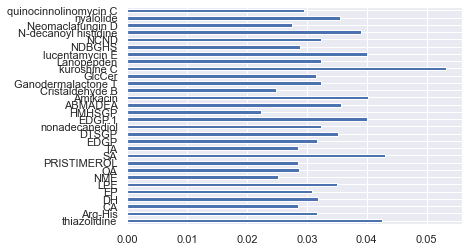

In [27]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))


In [ ]:
Body Mass Index
kuroshine C
Lanopepden
Stearic acid
N-decanoyl histidine
Neomaclafungin D
5-{[4-(Aminooxy)butyl](methyl)amino}-5-deoxy-8-ethenyladenosine
Amikacin
1,2-thiazolidine
lucentamycin E